# Exploratory Data Analysis

## Pull data from raw files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

In [3]:
def get_data(filename):
    """
    function to pull only the data to be used by the model from the flat files
    
    filename is a string which must match the name of the csv file in the raw data folder
    """
    
    df = pd.read_csv('raw data/'+filename+'.csv', parse_dates =  {'date' : [0]}, 
                     date_parser = parser)
    
    df.drop(['1. open', '4. close', '6. volume', '7. dividend amount', 
             '8. split coefficient'], axis = 1, inplace = True)
    
    df.set_index('date', inplace = True)
    
    return df

In [4]:
data = get_data('msft')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2263 entries, 2010-01-04 to 2018-12-28
Data columns (total 3 columns):
2. high              2263 non-null float64
3. low               2263 non-null float64
5. adjusted close    2263 non-null float64
dtypes: float64(3)
memory usage: 70.7 KB


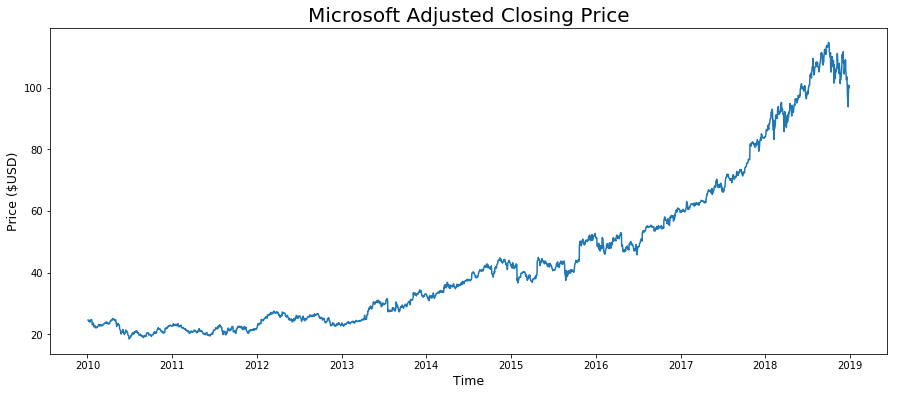

In [6]:
plt.figure(figsize=(15,6))
plt.plot(data['5. adjusted close'])
plt.title('Microsoft Adjusted Closing Price', fontsize=20)
plt.ylabel('Price ($USD)', fontsize=12.5)
plt.xlabel('Time', fontsize=12.5)
plt.show()

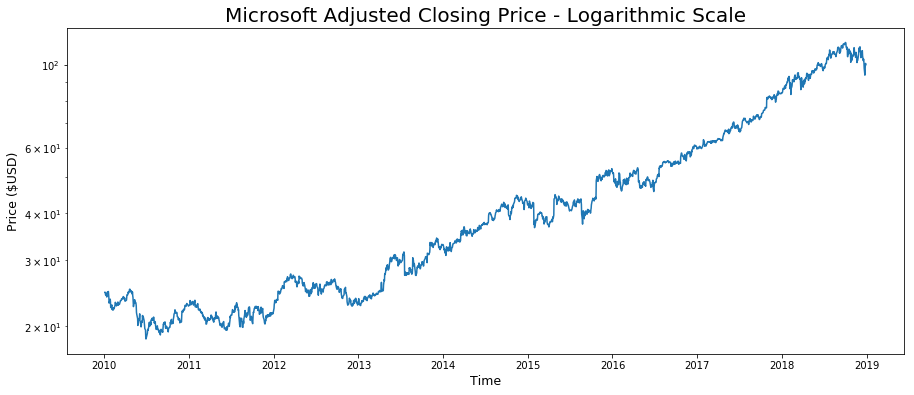

In [7]:
plt.figure(figsize=(15,6))
plt.plot(data['5. adjusted close'])
plt.title('Microsoft Adjusted Closing Price - Logarithmic Scale', fontsize=20)
plt.ylabel('Price ($USD)', fontsize=12.5)
plt.yscale('log')
plt.xlabel('Time', fontsize=12.5)
plt.show()

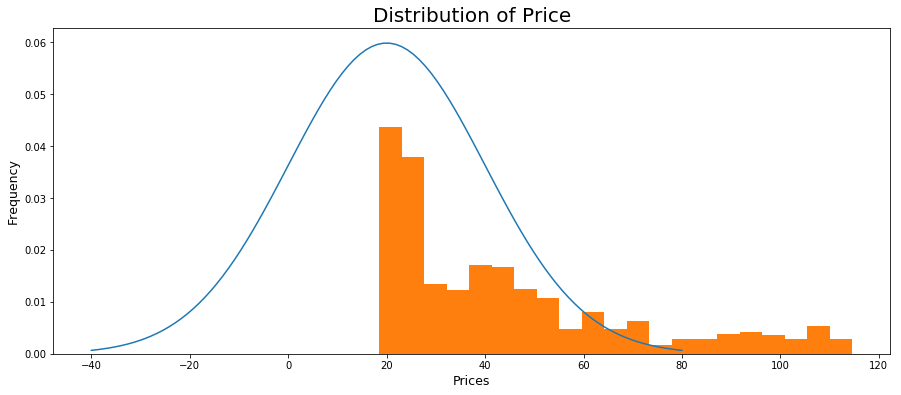

In [8]:
mu = 20
sigma = 20
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(figsize=(15,6))
plt.plot(x, 3*stats.norm.pdf(x, mu, sigma))
plt.hist(data['5. adjusted close'], bins='auto', density=True)
plt.title('Distribution of Price', fontsize=20)
plt.xlabel('Prices', fontsize=12.5)
plt.ylabel('Frequency', fontsize=12.5)
plt.show()

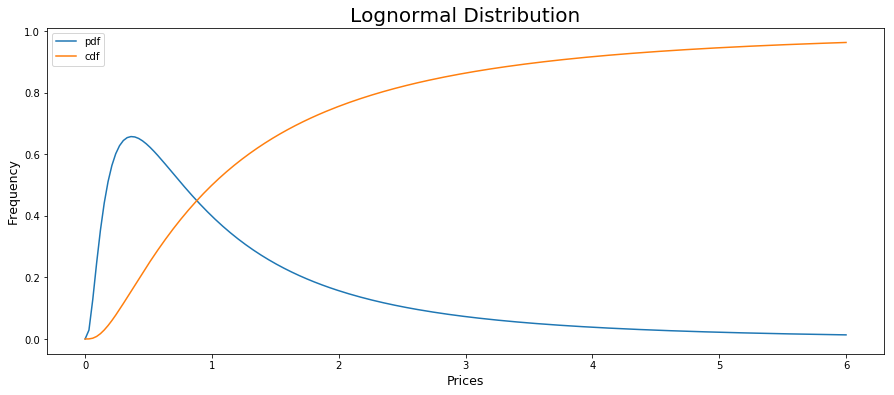

In [9]:
std = 1
mean = 0
dist = stats.lognorm([std], loc=mean)

x = np.linspace(0,6,200)
plt.figure(figsize=(15,6))
plt.plot(x, dist.pdf(x), label='pdf')
plt.plot(x, dist.cdf(x), label='cdf')
plt.title('Lognormal Distribution', fontsize=20)
plt.xlabel('Prices', fontsize=12.5)
plt.ylabel('Frequency', fontsize=12.5)
plt.legend()
plt.show()